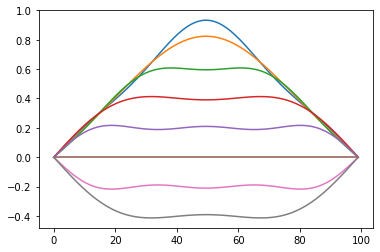

In [1]:
# 1.b
import matplotlib.pyplot as plt
import numpy as np

L = 1
d = 1
v = 1
x = np.linspace(0, L, 100)

def y(x, t, A):
    sum = x*0
    for n in range(len(A)):
        sum += A[n] * np.sin(x * n * np.pi / L) * np.cos(n * np.pi * v * t / L)
    return sum

A = np.array([0, 1, 0, -1/9, 0, 1/25]) * 8 * d / np.pi**2

for t in [0, .1, .2, .3, .4, .5, .6, .7]:
    plt.plot(y(x, t, A))
plt.show()


Omega_over_hbar=1 and omega_1=10
The numerical solution is in blue and the rotating wave approximation from question 3 is in orange.


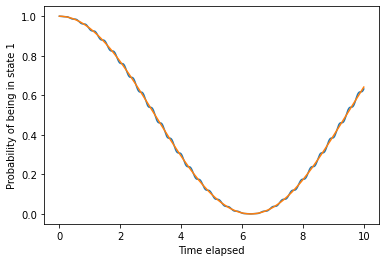


Omega_over_hbar=1 and omega_1=2
The numerical solution is in blue and the rotating wave approximation from question 3 is in orange.


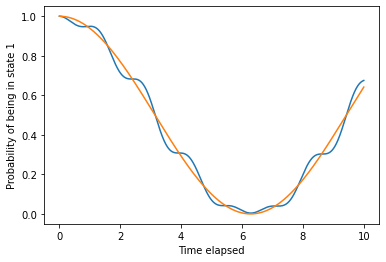


Omega_over_hbar=2 and omega_1=1
The numerical solution is in blue and the rotating wave approximation from question 3 is in orange.


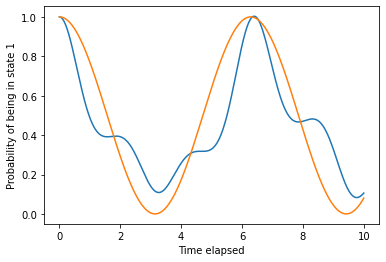

In [2]:
# 2 and 3
def plot(Omega_over_hbar, omega_1, time, time_step):
    state_1_probabilities = []
    a_1 = 1
    a_2 = 0
    times = np.arange(0, time, time_step)
    for t in times:
        # calculate derivatives
        d_1 = (Omega_over_hbar / 4) * a_2 * (1 + np.exp((0-2j) * t * omega_1)) / (0+1j)
        d_2 = (Omega_over_hbar / 4) * a_1 * (1 + np.exp((0+2j) * t * omega_1)) / (0+1j)
        a_1 += time_step * d_1
        a_2 += time_step * d_2
        t += time_step
        state_1_probabilities.append(np.abs(a_1) ** 2)
    plt.xlabel("Time elapsed")
    plt.ylabel("Probability of being in state 1")
    plt.plot(times, state_1_probabilities)
    plt.plot(times, np.cos(Omega_over_hbar * times / 4)**2)
    print(f"\n{Omega_over_hbar=} and {omega_1=}")
    print("The numerical solution is in blue and the rotating wave approximation from question 3 is in orange.")
    plt.show()

time = 10
time_step = .001
plot(1, 10, time, time_step) # blue
plot(1, 2, time, time_step)  # orange
plot(2, 1, time, time_step)  # green

plt.show()

In [3]:
!pip install qutip

In [4]:
# QUantum Toolbox In Python
import qutip as qt

def print_qobj(qutip_object):
    # Prints just the matrix data, without the other info
    assert isinstance(qt.sigmax(), qt.core.qobj.Qobj)
    print(qutip_object[:, :])

In [5]:
# 6.a
# For convenience, assume hbar=1 throughout this course, so
# S = sigma / 2
S_x = qt.sigmax() / 2
S_y = qt.sigmay() / 2
S_z = qt.sigmaz() / 2
print_qobj(qt.sigmax())
print('\n')
print_qobj(qt.sigmay())
print('\n')
print_qobj(qt.sigmaz())

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]


[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]


In [6]:
# 6.b
Psi_1 = qt.basis(2, 0)
print_qobj(Psi_1)
print('\n')
print(qt.expect(S_z, Psi_1))

[[1.+0.j]
 [0.+0.j]]


0.5


In [7]:
# 6.c
Psi_2 = (qt.basis(2, 0) + qt.basis(2, 1)).unit()
print_qobj(Psi_2)
print('\n')
print(qt.expect(S_z, Psi_2))

[[0.70710678+0.j]
 [0.70710678+0.j]]


0.0


In [8]:
# 6.d
def uncertainty(operator, state):
    return np.sqrt(qt.expect(operator * operator, state) - qt.expect(operator, state) ** 2)

print(uncertainty(S_z, Psi_1))

0.0


In [9]:
# 6.e
print(uncertainty(S_z, Psi_2))

0.49999999999999994


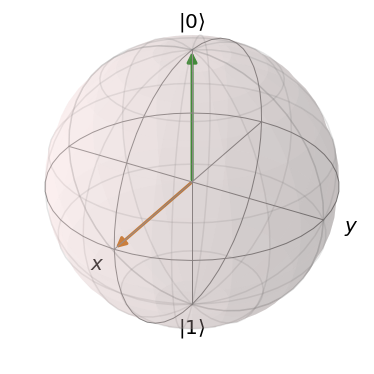


|+X> is Psi_2 because it is the eigenvector of S_x with eigenvalue +1.


In [10]:
# 6.f
b = qt.Bloch()
b.add_states(Psi_1) # plot in green
b.add_states(Psi_2) # plot in orange
b.show()
print("\n|+X> is Psi_2 because it is the eigenvector of S_x with eigenvalue +1.")